In [ ]:
# CHECK IF RUNNING INSIDE GOOGLE.COLAB

import sys
import os

IN_COLAB = 'google.colab' in sys.modules
CLONED = 0
if IN_COLAB and not CLONED:
    # clone the repo
    !git clone https://github.com/technogleb/ts_walkthrough
    CLONED = 1
    # append to sys.path
    sys.path.append('/content/ts_walkthrough')
    # change working directory to project root
    os.chdir('/content/ts_walkthrough')
    # install requirements
    !pip install -r requirements.txt

In [103]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent))

In [105]:
import numpy as np
import pandas as pd

In [106]:
import dataset
from plotting import plot_ts

### Возьмем из датасета ряд с минимальными температурами.

In [107]:
dataset = dataset.Dataset('./data/dataset/')

In [108]:
ts = dataset['daily-min-temperatures.csv']

In [109]:
ts.head()

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
Name: 20.7, dtype: float64

In [110]:
ts.tail()

1981-01-01
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: 20.7, dtype: float64

In [111]:
plot_ts(ts)

Loading BokehJS ...

## Поэтапное построение самого базового пайплайна для прогнозирования

### Задание 1.

Напишите функцию transform_to_matrix, которая бы принимала одномерный ряд и возвращала матрицу лагов

1. Функция должна принимать временной ряд (pd.Series) и количество лагов (оно же количество признаков). 

2. Функция должна проходить по ряду скользящим окном с шириной num_lags и брать лаги текущего окна в качестве признаков, а следующую точку в качестве ответа на данном обьекте.
3. Каждое перемещение окна на одну точку вперед сооветствует новому обьекту матрицы.
4. Функция должная вернуть pd.Dataframe - т.е. матрицу объекты признаки.

In [112]:
def transform_to_matrix(ts, num_lags):
    """
    Transforms time series into lags matrix to allow
    applying supervised learning algorithms

    Parameters
    ------------
    ts
        Time series to transform

    Returns
    --------
    lags_matrix
        Dataframe with transformed values
    """
    # <your code here>
    ts_values = ts.values
    data = {}
    for i in range(num_lags + 1):
        data[f'lag_{num_lags - i}'] = np.roll(ts_values, -i)

    lags_matrix = pd.DataFrame(data)[:-num_lags]
    lags_matrix.index = ts.index[num_lags:]

    return lags_matrix

### Задание 2.

Получите матрицу обьекты-признаки в качестве num_lags выбрав период сезонности ряда (найти его можно либо по изначальному графику, либо по графику автокорреляции)

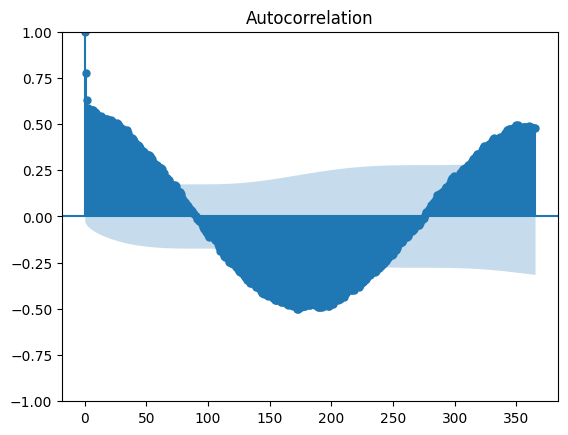

In [113]:
from statsmodels.graphics.tsaplots import plot_acf

# <your_code_here>
num_lags = 365
plot_acf(ts, lags=num_lags)
matrix = transform_to_matrix(ts, 365)

In [114]:
matrix

,lag_365,lag_364,lag_363,lag_362,lag_361,lag_360,lag_359,lag_358,lag_357,lag_356,...,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0
1981-01-01,,,,,,,,,,,,,,,,,,,,,
1982-01-02,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,...,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4,17.0,15.0
1982-01-03,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,...,14.2,14.0,15.5,13.3,15.6,15.2,17.4,17.0,15.0,13.5
1982-01-04,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,...,14.0,15.5,13.3,15.6,15.2,17.4,17.0,15.0,13.5,15.2
1982-01-05,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,...,15.5,13.3,15.6,15.2,17.4,17.0,15.0,13.5,15.2,13.0
1982-01-06,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,...,13.3,15.6,15.2,17.4,17.0,15.0,13.5,15.2,13.0,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,13.3,11.7,10.4,14.4,12.7,14.8,13.3,15.6,14.5,14.3,...,17.2,14.7,15.4,13.1,13.2,13.9,10.0,12.9,14.6,14.0
1990-12-28,11.7,10.4,14.4,12.7,14.8,13.3,15.6,14.5,14.3,15.3,...,14.7,15.4,13.1,13.2,13.9,10.0,12.9,14.6,14.0,13.6
1990-12-29,10.4,14.4,12.7,14.8,13.3,15.6,14.5,14.3,15.3,16.4,...,15.4,13.1,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5


### Задание 3.

Добавьте в модель следующие дополнительные признаки

* Для всех лагов кроме целевого на каждой строчке матрицы расчитайте среднее и стандартное отклонение (не включайте текущий лаг на данном объекте, чтобы избежать лика информации из будущего).
  
Для всех обьектов добавьте в качестве признаков следующие datetime признаки (см пример в основном обзоре)
1. sin/cos проекции дня недели текущего объекта на единичный круг
2. sin/cos проекции месяца текущего объекта на единичный круг
3. sin/cos проекции дня текущего объекта на единичный круг

Подсказка (получить соответствующие значения можно из аттрибутов обьекта datetime)

In [115]:
# <your code here>

import math

from pandas._libs.tslibs.timestamps import Timestamp

def get_month_sin(timestamp: Timestamp) -> float:
    theta = timestamp.month * (2*math.pi / 12)
    return math.sin(theta)

def get_month_cos(timestamp: Timestamp) -> float:
    theta = timestamp.month * (2*math.pi / 12)
    return math.cos(theta)


def get_day_sin(timestamp: Timestamp) -> float:
    theta = timestamp.day * (2*math.pi / timestamp.days_in_month)
    return math.sin(theta)


def get_day_cos(timestamp: Timestamp) -> float:
    theta = timestamp.day * (2*math.pi / timestamp.days_in_month)
    return math.cos(theta)


def get_dayofweek_sin(timestamp: Timestamp) -> float:
    theta = timestamp.dayofweek * (2*math.pi / 7)
    return math.sin(theta)


def get_dayofweek_cos(timestamp: Timestamp) -> float:
    theta = timestamp.dayofweek * (2*math.pi / 7)
    return math.cos(theta)


datetime_mappers = {
    'month_sin': get_month_sin,
    'month_cos': get_month_cos,
    'day_sin': get_day_sin,
    'day_cos': get_day_cos,
    'dayofweek_sin': get_dayofweek_sin,
    'dayofweek_cos': get_dayofweek_cos,
}

In [116]:
for f_name, f in datetime_mappers.items():
    matrix[f_name] = matrix.index.map(f)

In [117]:
matrix

,lag_365,lag_364,lag_363,lag_362,lag_361,lag_360,lag_359,lag_358,lag_357,lag_356,...,lag_3,lag_2,lag_1,lag_0,month_sin,month_cos,day_sin,day_cos,dayofweek_sin,dayofweek_cos
1981-01-01,,,,,,,,,,,,,,,,,,,,,
1982-01-02,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,...,15.2,17.4,17.0,15.0,5.000000e-01,0.866025,3.943559e-01,0.918958,-0.974928,-0.222521
1982-01-03,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,...,17.4,17.0,15.0,13.5,5.000000e-01,0.866025,5.712682e-01,0.820763,-0.781831,0.623490
1982-01-04,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,...,17.0,15.0,13.5,15.2,5.000000e-01,0.866025,7.247928e-01,0.688967,0.000000,1.000000
1982-01-05,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,...,15.0,13.5,15.2,13.0,5.000000e-01,0.866025,8.486443e-01,0.528964,0.781831,0.623490
1982-01-06,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,...,13.5,15.2,13.0,12.5,5.000000e-01,0.866025,9.377521e-01,0.347305,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,13.3,11.7,10.4,14.4,12.7,14.8,13.3,15.6,14.5,14.3,...,10.0,12.9,14.6,14.0,-2.449294e-16,1.000000,-7.247928e-01,0.688967,0.433884,-0.900969
1990-12-28,11.7,10.4,14.4,12.7,14.8,13.3,15.6,14.5,14.3,15.3,...,12.9,14.6,14.0,13.6,-2.449294e-16,1.000000,-5.712682e-01,0.820763,-0.433884,-0.900969
1990-12-29,10.4,14.4,12.7,14.8,13.3,15.6,14.5,14.3,15.3,16.4,...,14.6,14.0,13.6,13.5,-2.449294e-16,1.000000,-3.943559e-01,0.918958,-0.974928,-0.222521


### Задание 4.

Разделите на train/test в соотношении примерно 0.7 на 0.3, а также на X и y

Обратите внимание что тест всегда должен быть после трейна, чтобы избежать ликов из будущего, поэтому никакого stratified split

In [118]:
# <your code here>
split_idx = int(len(matrix)*0.7)
train, test = matrix[:split_idx], matrix[split_idx:]

X_train, y_train = train.drop('lag_0', axis=1), train['lag_0']
X_test, y_test = test.drop('lag_0', axis=1), test['lag_0'] 

### Задание 5. 

Обучите модель линейной регрессии из sklearn (LinearRegression, Ridge, Lasso)`

In [119]:
# <your code here>
from sklearn.linear_model import Lasso

lr = Lasso()

lr.fit(X_train, y_train)

Lasso()

### Задание 6.

Сделайте in-sample прогноз на test (по сути это просто вызов метода predict на данных из теста)

Нарисуйте рядом графики прогноза

In [120]:
# <your_code_here>
y_pred = lr.predict(X_test)

In [121]:
y_pred = pd.Series(y_pred, index=y_test.index)

In [122]:
plot_ts(y_test, y_pred)

Loading BokehJS ...

### Задание 7.

Сделайте out-of-sample прогноз на test.

Данный прогноз делается рекурсивным способом по следующему алгоритму:

Пусть есть временной ряд $Y_T$. 

1) Для следующей точки $Y_{T+1}$, в качестве лагов обьекта возьмите предыдущие $num\_lags$ точек.  
2) Добавьте дополнительные признаки к лагам  
3) Сделайте прогноз на полученном обьекте моделью линейной регрессии  
4) Добавьте прогноз к ряду $Y_T$  
5) Повторите пункт 1

И так далее пока не сделаeте прогноз до конца тестовой выборки.

In [144]:
# <your_code_here>

from copy import deepcopy

history = ts[:train.index[-1]]
granularity = ts.index[1] - ts.index[0]

y_pred = pd.Series()
for _ in range(len(test)):
    lags = history[-num_lags:]
    lags = lags.to_frame().T
    lags.index = [history.index[-1] + granularity]  # время следующей точки
    lags.columns = matrix.columns.drop(
        ['lag_0'] + [f for f in matrix.columns if (f.endswith('sin') or f.endswith('cos'))]
    )

    for f_name, f in datetime_mappers.items():
        lags[f_name] = lags.index.map(f)
    
    pred = lr.predict(lags)[0]
    y_pred = pd.concat([y_pred, pd.Series(pred, index=lags.index)])
    history = pd.concat([history, pd.Series(pred, index=lags.index)])

/var/folders/xk/304zh5617yn50x0ys84shn5m0000gn/T/ipykernel_52426/3253606764.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series()


In [146]:
plot_ts(y_test, y_pred)

Loading BokehJS ...